CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Jane College

## What does a Simple Linear Regression Model do?
#### A Simple Linear Regression Model establishes a relationship between an independent variable (x) and a dependent variable (y) by fitting a straight line to the data. It helps in predicting the value of y based on x using the equation:

\[
y = mx + b
\]

where:
- \( m \) is the slope (rate of change),
- \( b \) is the y-intercept (value of y when x = 0).

This model is useful in identifying trends, making forecasts, and understanding how changes in one variable affect another.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [8]:
data = sns.load_dataset('diamonds')


In [10]:
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
data.corr().head(7)


ValueError: could not convert string to float: 'Ideal'

In [14]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, fmt=".3f", cmap='coolwarm', cbar=False)
plt.title("Correlation with Price")
plt.show()


ValueError: could not convert string to float: 'Ideal'

<Figure size 600x400 with 0 Axes>

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Use the column with the strongest correlation with price
X = data[['carat']]  # The independent variable
y = data['price']    # The dependent variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = model.predict(X_test)
y_pred[:5]  # Display first 5 predictions


array([9540.64191438, 1940.07543252, 3180.98424589, 2327.8594367 ,
       4421.89305925])

In [22]:
predicted_df = pd.DataFrame(y_pred, columns=['predicted_price'])
predicted_df.head(3)


,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [24]:
results = X_test.copy()
results['actual_price'] = y_test.values
results['predicted_price'] = y_pred
results.head(5)


,carat,actual_price,predicted_price
20244,1.52,8674,9540.641914
45013,0.54,1637,1940.075433
53351,0.70,2657,3180.984246
47212,0.59,1838,2327.859437
1460,0.86,2980,4421.893059


In [26]:
sns.lineplot(data=melted_results, x='carat', y='Price', hue='Type', ci=None)
plt.title("Actual vs. Predicted Prices")
plt.show()


NameError: name 'melted_results' is not defined

C:\Users\antho\AppData\Local\Temp\ipykernel_1936\2761739574.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melted_results, x='carat', y='Price', hue='Type', ci=None)


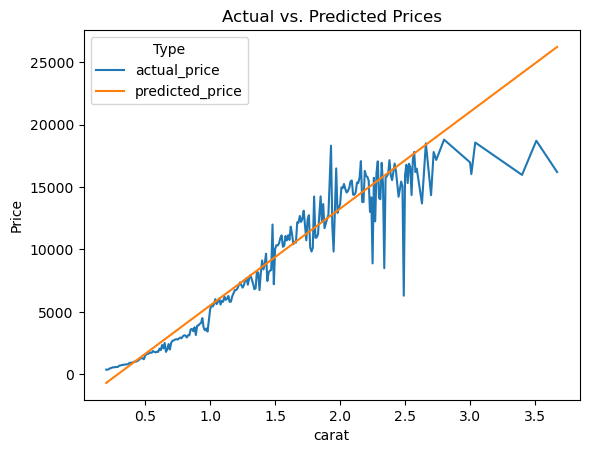

In [28]:
melted_results = results.melt(id_vars=['carat'], value_vars=['actual_price', 'predicted_price'],
                              var_name='Type', value_name='Price')

sns.lineplot(data=melted_results, x='carat', y='Price', hue='Type', ci=None)
plt.title('Actual vs. Predicted Prices')
plt.show()


In [30]:
melted_results = results.melt(id_vars=['carat'], value_vars=['actual_price', 'predicted_price'], 
                              var_name='Type', value_name='Price')
melted_results.head()


,carat,Type,Price
0,1.52,actual_price,8674.0
1,0.54,actual_price,1637.0
2,0.70,actual_price,2657.0
3,0.59,actual_price,1838.0
4,0.86,actual_price,2980.0


C:\Users\antho\AppData\Local\Temp\ipykernel_1936\2944319799.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melted_results, x='carat', y='Price', hue='Type', ci=None)


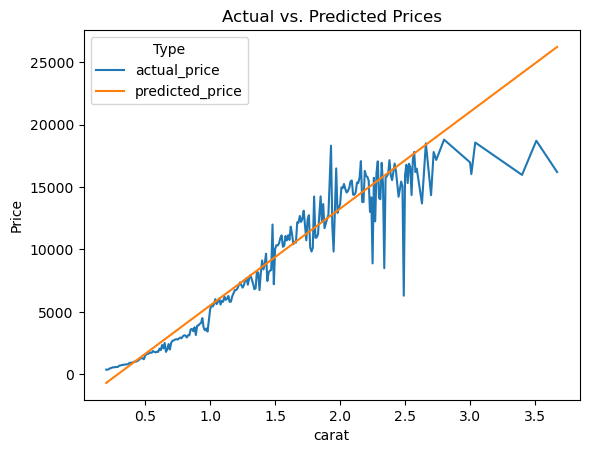

In [32]:
sns.lineplot(data=melted_results, x='carat', y='Price', hue='Type', ci=None)
plt.title("Actual vs. Predicted Prices")
plt.show()


In [34]:
X = data.carat.values.reshape(-1,1)
y = data.price

lr = LinearRegression()
predicted = lr.fit(X,y)

m = predicted.coef_
b = predicted.intercept_

print(f"The slope is {m} and the y-intercept is {b}")


The slope is [7756.42561797] and the y-intercept is -2256.3605800453947


In [36]:
print(f"Regression line equation is y = {m}x + {b}")


Regression line equation is y = [7756.42561797]x + -2256.3605800453947


In [38]:
carat_value = 0.70
estimated_price = m * carat_value + b
print(f"The predicted price for a {carat_value} carat diamond is ${estimated_price[0]:,.2f}")


The predicted price for a 0.7 carat diamond is $3,173.14


In [40]:
carat_value = 0.54
estimated_price = m * carat_value + b
print(f"The predicted price for a {carat_value} carat diamond is ${estimated_price[0]:,.2f}")


The predicted price for a 0.54 carat diamond is $1,932.11
